In [1]:
from pyspark.sql import SparkSession


In [3]:
spark=SparkSession.builder.appName("project").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/08/10 23:51:09 WARN Utils: Your hostname, Omars-MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.44 instead (on interface en0)
25/08/10 23:51:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/10 23:51:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
df=spark.read.csv('sentiment_analysis.csv',inferSchema=True,header=True)

In [6]:
df.show()

+---+-----+--------------------+
| id|label|               tweet|
+---+-----+--------------------+
|  1|    0|#fingerprint #Pre...|
|  2|    0|Finally a transpa...|
|  3|    0|We love this! Wou...|
|  4|    0|I'm wired I know ...|
|  5|    1|What amazing serv...|
|  6|    1|iPhone software u...|
|  7|    0|Happy for us .. #...|
|  8|    0|New Type C charge...|
|  9|    0|Bout to go shoppi...|
| 10|    0|Photo: #fun #self...|
| 11|    1|hey #apple when y...|
| 12|    1|Ha! Not heavy mac...|
| 13|    1|Contemplating giv...|
| 14|    0|I just made anoth...|
| 15|    1|@shaqlockholmes @...|
| 16|    0|From #DeepEllum t...|
| 17|    0|Like and Share if...|
| 18|    0|Go crazy !! #ipho...|
| 19|    1|The reason I don'...|
| 20|    1|How is the apple ...|
+---+-----+--------------------+
only showing top 20 rows


In [9]:
df.describe().show()

+-------+-----------------+-------------------+--------------------+
|summary|               id|              label|               tweet|
+-------+-----------------+-------------------+--------------------+
|  count|             7920|               7920|                7920|
|   mean|           3960.5| 0.2558080808080808|                NULL|
| stddev|2286.451399002393|0.43634200610479335|                NULL|
|    min|                1|                  0| #Thanksgiving! D...|
|    max|             7920|                  1|｡✷ 𝒜 𝓌𝑒𝓁𝓁-𝓇...|
+-------+-----------------+-------------------+--------------------+



In [11]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- tweet: string (nullable = true)



In [13]:
df.select('tweet').show()

+--------------------+
|               tweet|
+--------------------+
|#fingerprint #Pre...|
|Finally a transpa...|
|We love this! Wou...|
|I'm wired I know ...|
|What amazing serv...|
|iPhone software u...|
|Happy for us .. #...|
|New Type C charge...|
|Bout to go shoppi...|
|Photo: #fun #self...|
|hey #apple when y...|
|Ha! Not heavy mac...|
|Contemplating giv...|
|I just made anoth...|
|@shaqlockholmes @...|
|From #DeepEllum t...|
|Like and Share if...|
|Go crazy !! #ipho...|
|The reason I don'...|
|How is the apple ...|
+--------------------+
only showing top 20 rows


In [35]:
from pyspark.sql.functions import col, lower, regexp_replace,length,trim
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer


In [17]:
tokenizer = Tokenizer(inputCol='tweet', outputCol='words')

In [19]:
words=tokenizer.transform(df)

In [21]:
words.show(truncate=False)

+---+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id |label|tweet                                                                                                                                                                                                                                                                             |words                                                                                                                                 

In [23]:
df_clean = df.withColumn(
    "tweet",
    lower(regexp_replace("tweet", r"http\S+|@\w+|#\w+|[^a-zA-Z\s]", ""))
)

In [25]:
df_clean.show()

+---+-----+--------------------+
| id|label|               tweet|
+---+-----+--------------------+
|  1|    0|      test          |
|  2|    0|finally a transpa...|
|  3|    0|we love this woul...|
|  4|    0|im wired i know i...|
|  5|    1|what amazing serv...|
|  6|    1|iphone software u...|
|  7|    0|happy for us        |
|  8|    0|new type c charge...|
|  9|    0|bout to go shoppi...|
| 10|    0|  photo             |
| 11|    1|hey  when you mak...|
| 12|    1|ha not heavy mach...|
| 13|    1|contemplating giv...|
| 14|    0|i just made anoth...|
| 15|    1|  the battery is ...|
| 16|    0|from  towards    ...|
| 17|    0|like and share if...|
| 18|    0|   go crazy         |
| 19|    1|the reason i dont...|
| 20|    1|how is the apple ...|
+---+-----+--------------------+
only showing top 20 rows


In [27]:
df_clean.select("tweet").show(10, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                              |
+-------------------------------------------------------------------------------------------------------------------+
|  test                                                                                                             |
|finally a transparant silicon case  thanks to my uncle                                                             |
|we love this would you go                                                                                          |
|im wired i know im george i was made that way                                                                      |
|what amazing service apple wont even talk to me about a question i have unless i pay them  for their stupid support|
|iphone software update fucked up my phone big time stup

In [29]:
df=df_clean

In [31]:
df.select("tweet").show(10,truncate=False)

+-------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                              |
+-------------------------------------------------------------------------------------------------------------------+
|  test                                                                                                             |
|finally a transparant silicon case  thanks to my uncle                                                             |
|we love this would you go                                                                                          |
|im wired i know im george i was made that way                                                                      |
|what amazing service apple wont even talk to me about a question i have unless i pay them  for their stupid support|
|iphone software update fucked up my phone big time stup

In [37]:
df = df.withColumn("tweet", trim(df["tweet"]))

In [39]:
df.select("tweet").show(10,truncate=False)

+-------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                              |
+-------------------------------------------------------------------------------------------------------------------+
|test                                                                                                               |
|finally a transparant silicon case  thanks to my uncle                                                             |
|we love this would you go                                                                                          |
|im wired i know im george i was made that way                                                                      |
|what amazing service apple wont even talk to me about a question i have unless i pay them  for their stupid support|
|iphone software update fucked up my phone big time stup

In [41]:
df = df.withColumn("tweet", regexp_replace("tweet", r"\bpictwitter\w+\b", ""))


In [43]:
df.select("tweet").show(10,truncate=False)

+-------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                              |
+-------------------------------------------------------------------------------------------------------------------+
|test                                                                                                               |
|finally a transparant silicon case  thanks to my uncle                                                             |
|we love this would you go                                                                                          |
|im wired i know im george i was made that way                                                                      |
|what amazing service apple wont even talk to me about a question i have unless i pay them  for their stupid support|
|iphone software update fucked up my phone big time stup

In [45]:
df = df.withColumn("tweet", regexp_replace("tweet", r"\s{2,}", " "))

# Remove leading/trailing spaces
df = df.withColumn("tweet", trim(df["tweet"]))



In [49]:
df.select("tweet").show(20,truncate=False)

+------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                             |
+------------------------------------------------------------------------------------------------------------------+
|test                                                                                                              |
|finally a transparant silicon case thanks to my uncle                                                             |
|we love this would you go                                                                                         |
|im wired i know im george i was made that way                                                                     |
|what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support|
|iphone software update fucked up my phone big time stupid iphon

In [53]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
df = remover.transform(df)
df.select("tweet", "filtered_words").show(truncate=False)

25/08/11 01:12:21 WARN StopWordsRemover: Default locale set was [en_EG]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


+------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------+
|tweet                                                                                                             |filtered_words                                                                                           |
+------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------+
|test                                                                                                              |[test]                                                                                                   |
|finally a transparant silicon case thanks to my uncle                                                      

In [57]:
df.select('tweet','filtered_words').show()

+--------------------+--------------------+
|               tweet|      filtered_words|
+--------------------+--------------------+
|                test|              [test]|
|finally a transpa...|[finally, transpa...|
|we love this woul...|          [love, go]|
|im wired i know i...|[im, wired, know,...|
|what amazing serv...|[amazing, service...|
|iphone software u...|[iphone, software...|
|        happy for us|         [happy, us]|
|new type c charge...|[new, type, c, ch...|
|bout to go shoppi...|[bout, go, shoppi...|
|               photo|             [photo]|
|hey when you make...|[hey, make, new, ...|
|ha not heavy mach...|[ha, heavy, machi...|
|contemplating giv...|[contemplating, g...|
|i just made anoth...|[made, another, c...|
|the battery is so...|[battery, painful...|
|        from towards|           [towards]|
|like and share if...|[like, share, wan...|
|            go crazy|         [go, crazy]|
|the reason i dont...|[reason, dont, on...|
|how is the apple ...|[apple, st

In [59]:
from pyspark.sql.functions import explode, col

# Explode filtered words into separate rows
words_df = df.select(explode(col("filtered_words")).alias("word"))

# Count and sort by frequency
word_counts = words_df.groupBy("word").count().orderBy(col("count").desc())

word_counts.show(20, truncate=False)


+--------+-----+
|word    |count|
+--------+-----+
|new     |876  |
|iphone  |759  |
|phone   |735  |
|apple   |686  |
|follow  |544  |
|love    |414  |
|rt      |321  |
|day     |312  |
|gain    |309  |
|like    |309  |
|im      |308  |
|get     |293  |
|back    |285  |
|got     |279  |
|happy   |239  |
|one     |204  |
|time    |200  |
|photo   |198  |
|cant    |188  |
|everyone|179  |
+--------+-----+
only showing top 20 rows


In [63]:
from pyspark.sql.functions import regexp_extract

df_hashtags = df.withColumn("hashtag", regexp_extract("tweet", r"#(\w+)", 1))
df_hashtags.groupBy("hashtag").count().orderBy("count", ascending=False).show(20)


+-------+-----+
|hashtag|count|
+-------+-----+
|       | 7920|
+-------+-----+



In [65]:
df.show()

+---+-----+--------------------+--------------------+--------------------+
| id|label|               tweet|               words|      filtered_words|
+---+-----+--------------------+--------------------+--------------------+
|  1|    0|                test|              [test]|              [test]|
|  2|    0|finally a transpa...|[finally, a, tran...|[finally, transpa...|
|  3|    0|we love this woul...|[we, love, this, ...|          [love, go]|
|  4|    0|im wired i know i...|[im, wired, i, kn...|[im, wired, know,...|
|  5|    1|what amazing serv...|[what, amazing, s...|[amazing, service...|
|  6|    1|iphone software u...|[iphone, software...|[iphone, software...|
|  7|    0|        happy for us|    [happy, for, us]|         [happy, us]|
|  8|    0|new type c charge...|[new, type, c, ch...|[new, type, c, ch...|
|  9|    0|bout to go shoppi...|[bout, to, go, sh...|[bout, go, shoppi...|
| 10|    0|               photo|             [photo]|             [photo]|
| 11|    1|hey when you m

In [67]:
# Count true labels
df.groupBy("label").count().show()



+-----+-----+
|label|count|
+-----+-----+
|    1| 2026|
|    0| 5894|
+-----+-----+



In [69]:
df.groupBy("").count().show()

+--------------------+-----+
|               words|count|
+--------------------+-----+
|[excuse, me, wait...|    1|
|[my, small, garde...|    2|
|[yeeee, new, phon...|    1|
|[i, like, api, ch...|    1|
|[good, birthday, ...|    1|
|[in, or, yrs, i, ...|    1|
|[mission, accompl...|    1|
|[just, got, my, b...|    1|
|[another, cool, p...|    1|
|[oneplusofficial,...|    1|
|[megansum, being,...|    1|
|[phone, fucked, c...|    1|
|[just, dropped, t...|    1|
|[new, smartphone, d]|    1|
|[is, this, wat, w...|    1|
|[iphones, stuck, ...|    1|
|[playing, video, ...|    1|
|[when, my, phone,...|    1|
|[gain, followers,...|    1|
|[guess, what, cam...|    1|
+--------------------+-----+
only showing top 20 rows


In [71]:
model_data = df.select("filtered_words", "label")


In [73]:
model_data.show()

+--------------------+-----+
|      filtered_words|label|
+--------------------+-----+
|              [test]|    0|
|[finally, transpa...|    0|
|          [love, go]|    0|
|[im, wired, know,...|    0|
|[amazing, service...|    1|
|[iphone, software...|    1|
|         [happy, us]|    0|
|[new, type, c, ch...|    0|
|[bout, go, shoppi...|    0|
|             [photo]|    0|
|[hey, make, new, ...|    1|
|[ha, heavy, machi...|    1|
|[contemplating, g...|    1|
|[made, another, c...|    0|
|[battery, painful...|    1|
|           [towards]|    0|
|[like, share, wan...|    0|
|         [go, crazy]|    0|
|[reason, dont, on...|    1|
|[apple, store, gu...|    1|
+--------------------+-----+
only showing top 20 rows


In [75]:
from pyspark.sql.functions import explode, col

# Explode filtered words into separate rows
words_df = df.select(explode(col("filtered_words")).alias("word"))

# Count and sort by frequency
word_counts = words_df.groupBy("word").count().orderBy(col("count").desc())

word_counts.show(20, truncate=False)


+--------+-----+
|word    |count|
+--------+-----+
|new     |876  |
|iphone  |759  |
|phone   |735  |
|apple   |686  |
|follow  |544  |
|love    |414  |
|rt      |321  |
|day     |312  |
|gain    |309  |
|like    |309  |
|im      |308  |
|get     |293  |
|back    |285  |
|got     |279  |
|happy   |239  |
|one     |204  |
|time    |200  |
|photo   |198  |
|cant    |188  |
|everyone|179  |
+--------+-----+
only showing top 20 rows


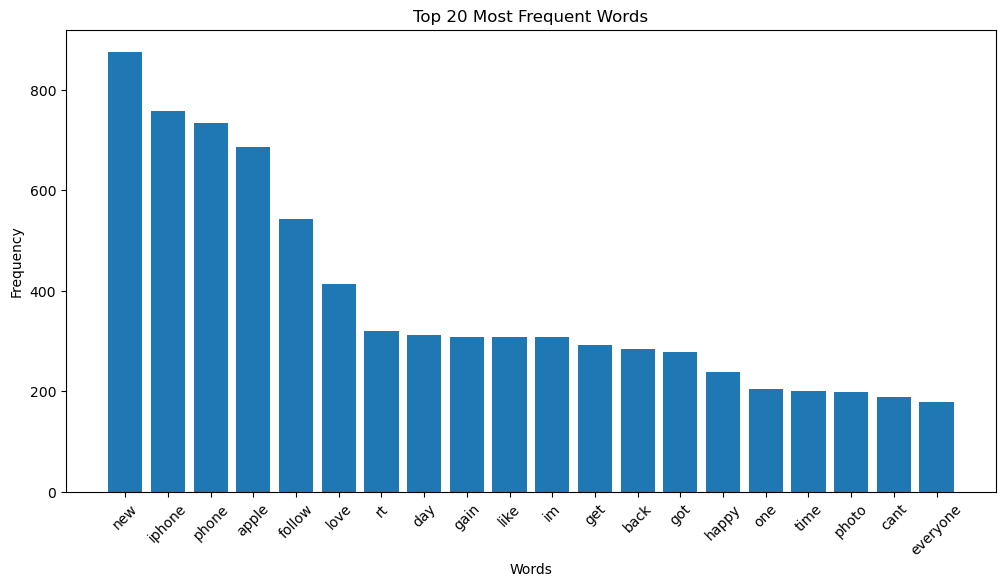

In [77]:
import matplotlib.pyplot as plt

# Convert to Pandas dataframe
top_words = word_counts.limit(20).toPandas()

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top_words['word'], top_words['count'])
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
